###### Axel Basocak

# Homework : K-means and PCA

### K-means:Clustering some real data

##### Download from the course site the 6D data stored in grade students.csv file

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

X = pd.read_csv('grade_students.csv')
print(X.shape)
X.head()

(5550, 6)


g1freelunch  g1absent  g1readscore  g1mathscore  g1listeningscore  \
0            1         9          516          578               601   
1            0        12          451          507               584   
2            1         4          483          526               529   
3            1        15          516          505               556   
4            1         2          433          463               504   

   g1wordscore  
0          493  
1          436  
2          486  
3          536  
4          426

##### Clustering the students in 3 clusters

In [43]:
# creating 3 samples, one with min values, one with mean values and another one with max values
data = {'g1freelunch': [X['g1freelunch'].min(),X['g1freelunch'].mean(),X['g1freelunch'].max()],
        'g1absent': [X['g1absent'].min(),X['g1absent'].mean(),X['g1absent'].max()],
        'g1readscore': [X['g1readscore'].min(),X['g1readscore'].mean(),X['g1readscore'].max()],
        'g1mathscore': [X['g1mathscore'].min(),X['g1mathscore'].mean(),X['g1mathscore'].max()],
        'g1listeningscore': [X['g1listeningscore'].min(),X['g1listeningscore'].mean(),X['g1listeningscore'].max()],
        'g1wordscore': [X['g1wordscore'].min(),X['g1wordscore'].mean(),X['g1wordscore'].max()]
       }

Centroids = pd.DataFrame(data, columns = ["g1freelunch","g1absent","g1readscore","g1mathscore","g1listeningscore","g1wordscore"])
Centroids.head()

Centroids_start = Centroids

##### K-means algorithm

In [44]:
#number of clusters
K=3

#Random Centroids
#Centroids = (X.sample(n=K))

diff = 1 #initialize diff at 1 
j=0

#diff equals 0 when there is no more centroids variation after two iterations
while(diff!=0):
    XD=X
    i=1 
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=0
            for col_c in Centroids.columns.tolist(): 
                d1+=(row_c[col_c]-row_d[col_c])**2
            d=np.sqrt(d1) #norm
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["g1freelunch","g1absent","g1readscore",
                                                   "g1mathscore","g1listeningscore","g1wordscore"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['g1wordscore'] - Centroids['g1wordscore']).sum() + (Centroids_new['g1listeningscore'] - Centroids['g1listeningscore']).sum() + (Centroids_new['g1mathscore'] - Centroids['g1mathscore']).sum() + (Centroids_new['g1readscore'] - Centroids['g1readscore']).sum() +(Centroids_new['g1absent'] - Centroids['g1absent']).sum() + (Centroids_new['g1freelunch'] - Centroids['g1freelunch']).sum() 
        Centroids = X.groupby(["Cluster"]).mean()[["g1freelunch","g1absent","g1readscore","g1mathscore","g1listeningscore","g1wordscore"]]

##### Results interpretations

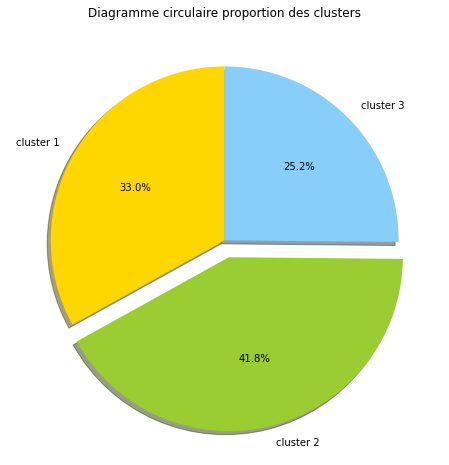

In [45]:
cluster_1 = 0
cluster_2 = 0
cluster_3 = 0


for i in range(0, len(X['Cluster'])): 
    
    if X['Cluster'][i] == 1:  
        
        cluster_1 += 1
          
    elif X['Cluster'][i] == 2:
        
        cluster_2 += 1
        
    elif X['Cluster'][i] == 3:
        
        cluster_3 += 1

        
clusters = [cluster_1,cluster_2,cluster_3]

plt.figure(figsize = (8, 8))
plt.title("Diagramme circulaire proportion des clusters")
plt.pie(clusters, explode = (0, 0.1, 0,), labels = ['cluster 1','cluster 2','cluster 3'],
           colors = ['gold', 'yellowgreen', 'lightskyblue'], autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

- Nous pouvons voir que la proportion des clusters est à l'avantage du cluster 2 (average values cluster).

- Cela peut potentiellement être  considéré comme des étudiants ayant des notes proche de la moyenne des notes de l'ensemble des élèves ou ayant des absences comprises dans la moyenne des élèves. Cependant les notes sont réparties sur 4 paramètres et les absences que sur 1. Les notes ont donc un plus gros impact dans l'association du cluster à un étudiant.

- De plus nous avons initiés les centroids sur 3 samples, un avec les valeurs les plus faibles, un autre avec les valeurs moyennes et un dernier avec les valeurs max.

- Nous arrêtons l'itération de l'algorithme jusque la différence entre le nouveau cluster et l'ancien soit égale.


### PCA: Reducing the dimension of some synthetic data

##### Download from the course site the 2D data stored in data pca.txt file.

(50, 2)


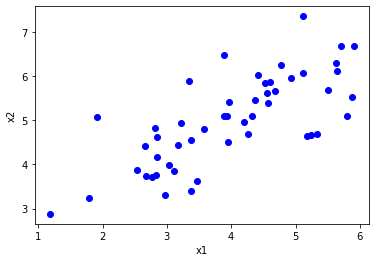

In [46]:
X = pd.read_csv('data_pca.txt',delim_whitespace=True,names = ["x1","x2"])
print(X.shape)
X.head()

plt.scatter(X["x1"],X["x2"],c='blue')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

##### PCA algorithm


- Eigen vectors and values from covariance matrix

In [47]:
cov_matrix = np.cov(X.T)

eig_values, eig_vectors = np.linalg.eig(cov_matrix)
#using the first value as it is the most efficient
eig_values[0]/ sum(eig_values) 

0.8706218910961314

- Project the data to the Eigen vector

In [48]:
project_data = X.dot(eig_vectors.T[0])

- principal axes of the data.


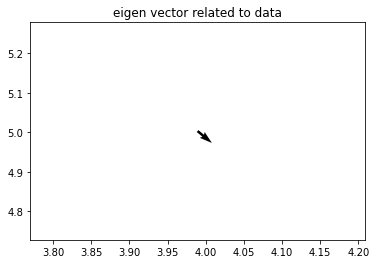

In [49]:
x = X.mean()["x1"]
y = X.mean()["x2"]

u = eig_vectors[0][0]
v = eig_vectors[0][1]


plt.title("eigen vector related to data")
plt.quiver(x,y,u,v)
plt.show()

##### Data visualization

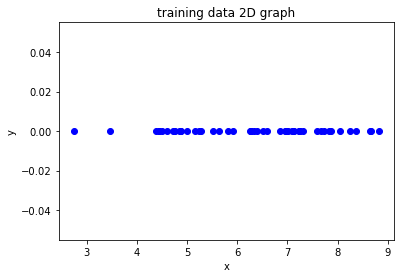

In [50]:
result = pd.DataFrame(project_data, columns=["PCA"])
result["y_axis"]=0.0

plt.title("training data 2D graph")
plt.scatter(result["PCA"],result["y_axis"],c='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### PCA: Reducing the dimension of some real data

##### Download from the course site the 8D data stored in diabetes.txt file

In [51]:
X = pd.read_csv('diabetes.csv')
print(X.shape)
X.head()

(768, 9)


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

##### Spliting data into diabetic and non-diabetic groups 

In [52]:
X_0 = X[X['Outcome'] == 0] #non-diabetic
X_0 = X_0.drop(['Outcome'], axis=1)
X_1 = X[X['Outcome'] == 1] #diabetic
X_1 = X_1.drop(['Outcome'], axis=1)

##### Non-diabetic group :

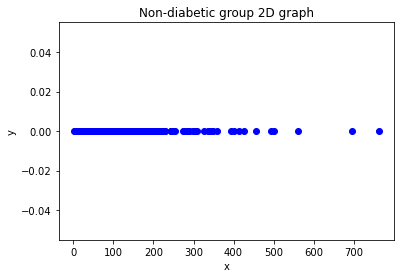

In [53]:
cov_matrix_0 = np.cov(X_0.T)

eig_values_0, eig_vectors_0 = np.linalg.eig(cov_matrix_0)

project_data_0 = X_0.dot(eig_vectors_0.T[0])

result_0 = pd.DataFrame(project_data_0, columns=["PCA"])
result_0["y_axis"]=0.0

plt.title("Non-diabetic group 2D graph")
plt.scatter(result_0["PCA"],result_0["y_axis"],c='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

##### Diabetic group :

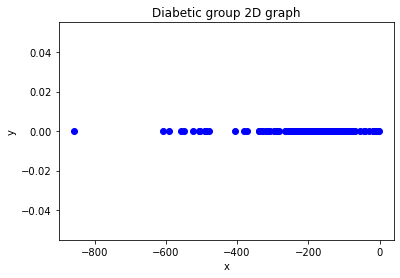

In [54]:
cov_matrix_1 = np.cov(X_1.T)

eig_values_1, eig_vectors_1 = np.linalg.eig(cov_matrix_1)

project_data_1 = X_1.dot(eig_vectors_1.T[0])

result_1 = pd.DataFrame(project_data_1, columns=["PCA"])
result_1["y_axis"]=0.0

plt.title("Diabetic group 2D graph")
plt.scatter(result_1["PCA"],result_1["y_axis"],c='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Results Interpretations

- Après avoir séparé les patients ayant eu le diabète et ceux ne l'ayant pas eu en deux groupes distincts. Nous avons ensuite pu  retirer cette donnée lors de la réduction de dimension puisqu"elle n'était plus primoridale.
- En passant de données en 8D à des données en 2D, cela permet de pouvoir afficher sur un graphe les résultats et de pouvoir les intépreter. Il est eventuellement possible de le réduire en 3D.
- Nous remarquons que la courbe après utilisation de l'algorithme PCA ; pour le groupe n'ayant pas de diabète les valeurs sont toutes négatives. A l'inverse le groupe n'ayant pas eu de diabète, les  valeurs sont positives.
- Ainsi pour détecter si oui ou non une personne possède le diabète, il suffit d'effectuer l'algortihme et de voir le signe de la valeur finale. Si elle est positive, alros la personne a le diabète.